In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load datasets

In [2]:
GDP = pd.read_csv('Final-GDP-dataset.csv')
suicide = pd.read_csv('../datasets/Suicide-rate.csv')
spending =  pd.read_csv('Final-GDP-dataset.csv')

C:\Users\ltpie\AppData\Local\Temp\ipykernel_22684\2218096916.py:1: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  GDP = pd.read_csv('Final-GDP-dataset.csv')
C:\Users\ltpie\AppData\Local\Temp\ipykernel_22684\2218096916.py:3: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  spending =  pd.read_csv('Final-GDP-dataset.csv')


### pre-process spending & GDP datasets

In [3]:
# Drop rows with irrelevant totals 
spending = spending.drop(spending[(spending.GeoName == 'New England') |\
                                  (spending.GeoName == 'District of Columbia') |\
                                  (spending.GeoName == 'Great Lakes') |\
                                  (spending.GeoName == 'Plains') |\
                                  (spending.GeoName == 'Southeast') |\
                                  (spending.GeoName == 'Southwest') |\
                                  (spending.GeoName == 'Far West') |\
                                  (spending.GeoName == 'Rocky Mountain') |\
                                  (spending.GeoName == 'Mideast')
                                 ].index)

GDP = GDP.drop(GDP[(GDP.GeoName == 'New England') |\
                                  (GDP.GeoName == 'District of Columbia') |\
                                  (GDP.GeoName == 'Great Lakes') |\
                                  (GDP.GeoName == 'Plains') |\
                                  (GDP.GeoName == 'Southeast') |\
                                  (GDP.GeoName == 'Southwest') |\
                                  (GDP.GeoName == 'Far West') |\
                                  (GDP.GeoName == 'Rocky Mountain') |\
                                  (GDP.GeoName == 'Mideast')
                                 ].index)

# Drop rows with irrelevant units 
spending = spending.drop(spending[spending.Unit != 'Thousands of dollars'].index)
GDP = GDP.drop(GDP[GDP.Unit != 'Thousands of dollars'].index)

# Drop irrelevant columns 
spending = spending.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)
GDP = GDP.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)

In [4]:
spending = spending.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})


GDP = GDP.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})

### Analysis GDP & spending

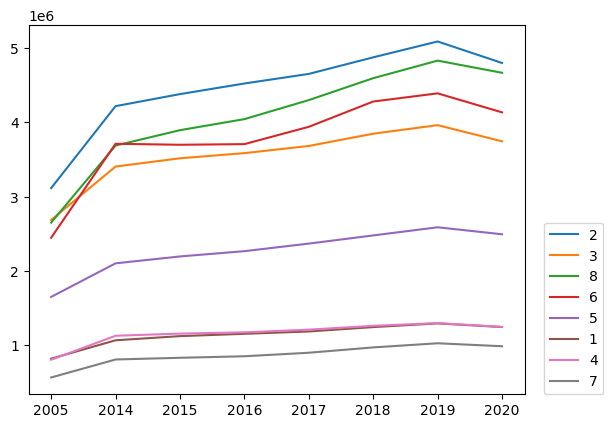

In [5]:
# spending & GDP per region per year
cols = ['2005', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
sp_avr = spending.groupby('Region').mean()[cols]
GDP_avr = GDP.groupby('Region').mean()[cols]


'''
which region spent the most?

NOTE: spending decline for all regions after 2019
'''
sp_avr.nlargest(n=8,columns=cols).T.plot()
plt.legend(loc=(1.04, 0));

In [6]:
'''
What is the main spending category per region?
  -->get top 20 spending categories per region

'''
sp_cat = spending.groupby(['Region','Description']).mean()[cols]
top20_per_region = pd.DataFrame()

for i in range(1,9):   
    '''
    NOTE: n=23 instead of 20 beacuse
    the top 3 spendings are totals 
    of different industries.  
        ---> exclude top 3
    '''
    top20 = sp_cat.loc[i].nlargest(n=23,columns=cols)
    top20 = top20.index[3:].to_list()
    top20_per_region[f'region {i}'] = top20

top20_per_region.head()

,region 1,region 2,region 3,region 4,region 5,region 6,region 7,region 8
0,"Finance, insurance, real estate, rental, and...","Finance, insurance, real estate, rental, and...",Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/,Private goods-producing industries 2/
1,Manufacturing and information,Real estate and rental and leasing,Manufacturing and information,"Finance, insurance, real estate, rental, and...","Finance, insurance, real estate, rental, and...",Manufacturing and information,"Finance, insurance, real estate, rental, and...","Finance, insurance, real estate, rental, and..."
2,Private goods-producing industries 2/,Manufacturing and information,"Finance, insurance, real estate, rental, and...",Manufacturing and information,Manufacturing and information,"Finance, insurance, real estate, rental, and...",Manufacturing and information,Manufacturing and information
3,Real estate and rental and leasing,Real estate,Manufacturing,Manufacturing,Trade,Trade,Trade,Trade
4,Real estate,Trade,Trade,Trade,Manufacturing,Manufacturing,Real estate and rental and leasing,Real estate and rental and leasing


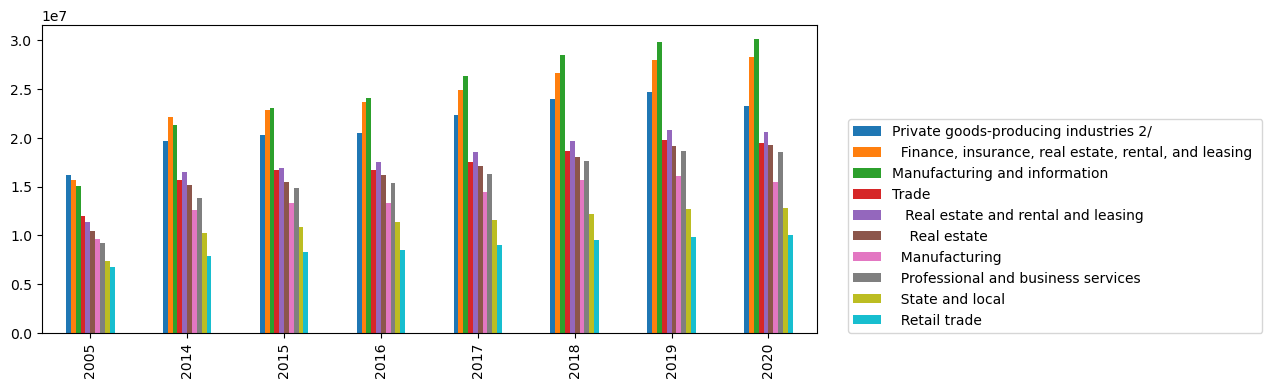

In [7]:
'''
plot top 10 spending categories per year 
for a specific region
  --> Region=8
'''
top10 = sp_cat.loc[8].nlargest(n=13,columns=cols)
top10.loc[top10.index[3:]].T.plot.bar(figsize=(10,4))
plt.legend(loc=(1.04, 0));

### pre-process suicide dataset

In [8]:
# extract region numbers column from spending data set & add it to suicide dataset
regions = spending[['GeoName','Region']]
df2 = pd.merge(suicide, regions, left_on='STATE', right_on='GeoName')
# THERE WAS AN ERROR HERE ON THE ORIGINAL FILE
df2.drop('GeoName', axis=1,inplace=True)
df2 = df2.drop_duplicates()

df2["YEAR"] = df2["YEAR"].apply(lambda x: str(x))

sui_avr = df2.groupby(['YEAR', 'Region']).mean()
sui_avr = sui_avr.rename(columns={'RATE': 'suicide rate'})



### pre-process unemployment dataset

In [35]:
employment_df = pd.read_csv('Final-Employment.csv')

employment_df.dtypes

Year                                int64
Region                              int64
labor force participation rate    float64
employment-population ratio       float64
labor force                       float64
employment                        float64
unemployment                      float64
unemployment rate                 float64
dtype: object

In [36]:
#we only want the value of unemployment rate, so we'll take the year, region and unemployment rate column
processed_unemp = employment_df[['Region','Year', 'unemployment rate']]

#change year to string type for merging
processed_unemp.loc[:,'Year'] = processed_unemp.loc[:,'Year'].apply(lambda x: str(x))
processed_unemp.dtypes

C:\Users\ltpie\AppData\Local\Temp\ipykernel_22684\702689560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_unemp.loc[:,'Year'] = processed_unemp.loc[:,'Year'].apply(lambda x: str(x))


Region                 int64
Year                  object
unemployment rate    float64
dtype: object

### merging datasets

In [37]:
income_df = pd.read_csv('../Gilbert/Income-Final.csv')

In [38]:
income_df

,Region,2005,2014,2015,2016,2017,2018,2019,2020
0,1,8.289722e+28,1.091640e+29,1.122024e+29,1.144674e+29,1.166858e+29,1.215441e+29,1.258892e+29,1.307726e+29
1,2,6.561755e+28,7.669286e+28,7.978126e+28,8.122464e+28,8.402967e+28,8.786138e+28,9.036308e+28,9.387483e+28
2,3,7.595063e+23,9.847682e+23,1.028869e+24,1.040729e+24,1.072229e+24,1.130729e+24,1.168770e+24,1.242790e+24
3,4,4.660189e+33,6.385639e+33,6.586353e+33,6.613068e+33,6.749498e+33,7.023358e+33,7.195361e+33,7.616080e+33
4,5,2.495774e+58,3.087949e+58,3.210950e+58,3.251201e+58,3.351952e+58,3.461619e+58,3.607370e+58,3.848289e+58
5,6,8.081822e+18,9.689093e+18,1.008360e+19,1.036835e+19,1.087435e+19,1.136660e+19,1.203111e+19,1.308187e+19
6,7,7.559459e+23,1.015948e+24,1.046788e+24,1.047808e+24,1.105028e+24,1.169069e+24,1.242489e+24,1.307170e+24
7,8,6.512565e+28,9.311252e+28,9.595924e+28,9.379761e+28,9.531598e+28,9.936436e+28,1.021944e+29,1.045945e+29


<b> Creating a common structure to all the data frames for merging</b>

In [39]:
#createing hierarchical indexing of year + region for each data frame
sp_df = sp_avr.iloc[1:].unstack().to_frame()
gdp_df = GDP_avr.iloc[1:].unstack().to_frame()
income_df = income_df.groupby('Region').mean().unstack().to_frame()
unemployment_df = processed_unemp.groupby(['Year', 'Region']).mean()

<b> Now they have a common structure with the same hierarchical indexing </b>

In [40]:
sp_df

0
     Region              
2005 1       8.182572e+05
     2       3.114584e+06
     3       2.685477e+06
     4       8.036759e+05
     5       1.649919e+06
...                   ...
2020 4       1.246523e+06
     5       2.492921e+06
     6       4.134161e+06
     7       9.857673e+05
     8       4.666662e+06

[64 rows x 1 columns]

In [41]:
gdp_df

0
     Region              
2005 1       8.182572e+05
     2       3.114584e+06
     3       2.685477e+06
     4       8.036759e+05
     5       1.649919e+06
...                   ...
2020 4       1.246523e+06
     5       2.492921e+06
     6       4.134161e+06
     7       9.857673e+05
     8       4.666662e+06

[64 rows x 1 columns]

In [42]:
income_df

0
     Region              
2005 1       8.289722e+28
     2       6.561755e+28
     3       7.595063e+23
     4       4.660189e+33
     5       2.495774e+58
...                   ...
2020 4       7.616080e+33
     5       3.848289e+58
     6       1.308187e+19
     7       1.307170e+24
     8       1.045945e+29

[64 rows x 1 columns]

In [44]:
unemployment_df

unemployment rate
Year Region                   
2005 1                4.445833
     2                5.075000
     3                5.715000
     4                4.210714
     5                5.539583
...                        ...
2020 4                5.282143
     5                7.129861
     6                7.355556
     7                5.738333
     8               10.566667

[64 rows x 1 columns]

<b> Renaming the indexes so that they match for merging, and columns for value representation </b>

In [45]:
sp_df = sp_df.rename(columns={0: 'spending'})
gdp_df = gdp_df.rename(columns={0: 'GDP'})
income_df = income_df.rename(columns={0: 'income'})


sp_df.index = sp_df.index.rename("Year", level=0)
gdp_df.index = gdp_df.index.rename("Year", level=0)
income_df.index = income_df.index.rename("Year", level=0)

# merged_df = pd.merge(ex, ex1, left_index=True, right_index=True, how='inner')
concatenated_df = pd.concat([sp_df, gdp_df, sui_avr, income_df, unemployment_df], axis=1)

In [46]:
concatenated_df

spending           GDP  suicide rate        income  \
     Region                                                           
2005 1       8.182572e+05  8.182572e+05      9.750000  8.289722e+28   
     2       3.114584e+06  3.114584e+06      8.260000  6.561755e+28   
     3       2.685477e+06  2.685477e+06     10.900000  7.595063e+23   
     4       8.036759e+05  8.036759e+05     12.500000  4.660189e+33   
     5       1.649919e+06  1.649919e+06     12.308333  2.495774e+58   
...                   ...           ...           ...           ...   
2020 4       1.246523e+06  1.246523e+06     17.400000  7.616080e+33   
     5       2.492921e+06  2.492921e+06     15.566667  3.848289e+58   
     6       4.134161e+06  4.134161e+06     19.250000  1.308187e+19   
     7       9.857673e+05  9.857673e+05     24.420000  1.307170e+24   
     8       4.666662e+06  4.666662e+06     17.016667  1.045945e+29   

             unemployment rate  
     Region                     
2005 1                4.445833  
     2                5.075000  
     3                5.715000  
     4                4.210714  
     5                5.539583  
...                        ...  
2020 4                5.282143  
     5                7.129861  
     6                7.355556  
     7                5.738333  
     8               10.566667  

[64 rows x 5 columns]